In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import scipy.optimize as sco
import scipy.interpolate as sci




In [21]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

0.001 0.02
0.002 0.025
-0.001 0.04


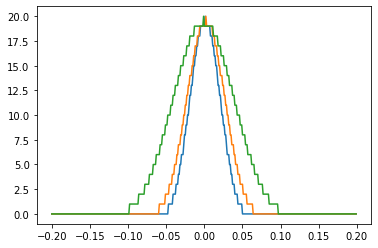

In [22]:
from matplotlib import pyplot as mp
import numpy as np
from functools import reduce

def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))*20).astype(int)

x_values = np.arange(-0.2,0.2,0.001)

Synthetic_Stocks = []

for mu, sig in [(0.001, 0.02), (0.002, 0.025), (-0.001, 0.04)]:
    

    print(mu, sig)
    
    mp.plot(x_values, gaussian(x_values, mu, sig))
    
    values = gaussian(x_values, mu, sig)


    Final_Stock = []

    for idx,x in enumerate(values):
        a = np.empty(x)
        a.fill(round(x_values[idx],3))
        
        Final_Stock.extend(list(a))

    
    Synthetic_Stocks.append(Final_Stock)
    
    



In [23]:
#Fill with zeros
maxL = max([len(Synthetic_Stocks[0]),len(Synthetic_Stocks[1]),len(Synthetic_Stocks[2])])
for i in range(0,3):
    a = np.empty(maxL - len(Synthetic_Stocks[i]))
    a.fill(0)
    Synthetic_Stocks[i].extend(a)
    print('mean {}'.format(np.mean(Synthetic_Stocks[i])))

    

mean 0.0005005336179295611
mean 0.0012529348986125924
mean -0.001000000000000003


In [24]:
Synthetic_Stocks.append([0 for x in range(0, maxL)])

In [25]:
import random
random.shuffle(Synthetic_Stocks[0])
random.shuffle(Synthetic_Stocks[1])
random.shuffle(Synthetic_Stocks[2])

In [26]:
initial_Value = 1000
for a in range(0,3):
    for i,num in enumerate(Synthetic_Stocks[a]):
        if i == 0:
            Synthetic_Stocks[a][i] = initial_Value
        else: 
            if Synthetic_Stocks[a][i]==0.0:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1]
            else:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1] + Synthetic_Stocks[a][i-1]*Synthetic_Stocks[a][i]
        

    

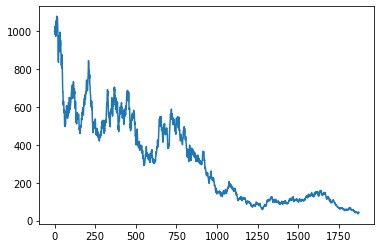

In [27]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


plt.plot(Synthetic_Stocks[2])


In [28]:
import datetime

start = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = [(start + datetime.timedelta(days=x)).strftime('%Y%m%d') for x in range(0, maxL)]

for date in date_generated[:5]:
    print(date)
Cash_Change_1 = [1 for x in range(0, maxL)]

20200101
20200102
20200103
20200104
20200105


In [29]:
Synthetic_Stocks

[[1000,
  1011.0,
  1049.418,
  1049.418,
  1053.615672,
  1053.615672,
  1026.221664528,
  1028.274107857056,
  1028.274107857056,
  1043.6982194749119,
  1081.2713553760086,
  1081.2713553760086,
  1080.1900840206326,
  1080.1900840206326,
  1075.8693236845502,
  1075.8693236845502,
  1075.8693236845502,
  1082.3245396266575,
  1096.394758641804,
  1096.394758641804,
  1102.9731271936548,
  1089.737449667331,
  1097.3656118150022,
  1091.8787837559273,
  1103.8894503772426,
  1104.9933398276198,
  1098.3633797886541,
  1098.3633797886541,
  1096.1666530290768,
  1096.1666530290768,
  1096.1666530290768,
  1102.7436529472511,
  1102.7436529472511,
  1110.4628585178818,
  1110.4628585178818,
  1099.3582299327031,
  1103.755662852434,
  1103.755662852434,
  1119.208242132368,
  1119.208242132368,
  1161.738155333398,
  1161.738155333398,
  1190.781609216733,
  1190.781609216733,
  1190.781609216733,
  1190.781609216733,
  1190.781609216733,
  1190.781609216733,
  1190.781609216733,
  11

In [30]:

synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2] )),columns =['Stock1', 'Stock2','Stock3'])
dates_df = pd.DataFrame(list(zip(date_generated,date_generated,date_generated)),columns =['Stock1', 'Stock2','Stock3'])
Cash_Change_1_df = pd.DataFrame(list(zip(Cash_Change_1,Cash_Change_1,Cash_Change_1)),columns =['Stock1', 'Stock2','Stock3'])
dates_df_squezed = pd.DataFrame(dates_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
dates_df_squezed.columns = ['datadate']
Cash_Change_1_df = pd.DataFrame(Cash_Change_1_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
df1_close = pd.DataFrame(synthetic_df.stack().squeeze()).reset_index().drop(columns=['level_0'])
df1_final = pd.concat([df1_close,dates_df_squezed,Cash_Change_1_df], axis=1)
df1_final.columns =['tic', 'daily_return','datadate','CashChange']
df1_final.loc[df1_final.tic == 'Stock1', 'tic'] = 'AAPL'
df1_final.loc[df1_final.tic == 'Stock2', 'tic'] = 'CL=F'
df1_final.loc[df1_final.tic == 'Stock3', 'tic'] = 'TSLA'
df1_final =df1_final[['datadate', 'daily_return','tic','CashChange']]

In [31]:
synthetic_df = df1_final
synthetic_df

,datadate,daily_return,tic,CashChange
0,20200101,1000.000000,AAPL,1
1,20200101,1000.000000,CL=F,1
2,20200101,1000.000000,TSLA,1
3,20200102,1011.000000,AAPL,1
4,20200102,998.000000,CL=F,1
...,...,...,...,...
5617,20250215,7650.365936,CL=F,1
5618,20250215,41.561322,TSLA,1
5619,20250216,2181.635472,AAPL,1
5620,20250216,7650.365936,CL=F,1


In [15]:
synthetic_df.to_csv('portfolio.csv')


In [32]:
asset_data = pd.read_csv("portfolio.csv")
asset_data

,Unnamed: 0,datadate_full,tic,close,volume,low,high,open,datadate,macd,rsi,cci,adx
0,0,2010-12-31,AAPL,11.520000,193508000.0,11.475357,11.552857,11.533929,20101231,0.000000,100.000000,66.666667,100.000000
1,1,2010-12-31,CL=F,91.379997,171010.0,89.050003,92.059998,89.669998,20101231,0.005617,100.000000,66.666667,100.000000
2,2,2010-12-31,TSLA,1.775333,21268500.0,1.766667,1.816667,1.771333,20101231,0.009062,100.000000,76.020027,100.000000
3,3,2011-01-03,AAPL,11.770357,445138400.0,11.601429,11.795000,11.630000,20110103,0.013901,100.000000,87.499856,100.000000
4,4,2011-01-03,CL=F,91.550003,225189.0,91.209999,92.580002,91.309998,20110103,0.015854,97.506997,86.070717,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,9070,2023-01-05,CL=F,73.669998,300731.0,72.459999,74.919998,73.250000,20230105,-19.258998,32.790586,-121.998583,47.953532
9065,9071,2023-01-05,TSLA,110.339996,157986300.0,107.160004,111.750000,110.510002,20230105,-19.840796,30.183328,-142.752397,56.655815
9066,9072,2023-01-06,AAPL,129.619995,87686600.0,124.889999,130.289993,126.010002,20230106,-19.628578,32.231170,-125.967754,56.655815
9067,9073,2023-01-06,CL=F,73.769997,300731.0,73.239998,75.470001,73.970001,20230106,-19.501870,31.658952,-119.366939,56.852222


In [19]:
asset_data = pd.read_csv("portfolio.csv")
asset_data

,Unnamed: 0,datadate,daily_return,tic,CashChange
0,0,20200101,1000.000000,AAPL,1
1,1,20200101,1000.000000,CL=F,1
2,2,20200101,1000.000000,TSLA,1
3,3,20200102,1000.000000,AAPL,1
4,4,20200102,1000.000000,CL=F,1
...,...,...,...,...,...
5617,5617,20250215,7688.809986,CL=F,1
5618,5618,20250215,45.828171,TSLA,1
5619,5619,20250216,2162.175889,AAPL,1
5620,5620,20250216,7688.809986,CL=F,1


In [17]:
# Create a list of symbols
symbols = [
  "TSLA", "MSFT", "CL=F", 'Cash'
]

In [18]:
synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2], Synthetic_Stocks[3] )),columns =['Stock1', 'Stock2','Stock3','Cash'])

asset_data = synthetic_df
daily_returns = synthetic_df
asset_data

,Stock1,Stock2,Stock3,Cash
0,1000.000000,1000.000000,1000.000000,0
1,1000.000000,1000.000000,1044.000000,0
2,992.000000,1000.000000,1036.692000,0
3,1028.704000,942.000000,1022.178312,0
4,1053.392896,937.290000,1075.331584,0
...,...,...,...,...
1869,2215.026420,7774.091773,46.739741,0
1870,2184.016050,7735.221314,46.506043,0
1871,2162.175889,7735.221314,47.343151,0
1872,2162.175889,7688.809986,45.828171,0


In [ ]:
# Compute daily simple returns
daily_returns = (
  asset_data.pct_change()
            .dropna(
              # Drop the first row since we have NaN's
              # The first date 2011-09-13 does not have a value since it is our cut-off date
              axis = 0,
              how = 'any',
              inplace = False
              )
)
# Examine the last 5 rows
daily_returns

In [ ]:
print(range(0, maxL))

daily_returns.mean()*len(range(0, maxL))

In [ ]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(daily_returns.mean() * weights)) * 251

In [ ]:
a = daily_returns.cov()
a.to_csv('covariance.csv', index=False)
b = pd.read_csv('covariance.csv')

np.sqrt(np.transpose(weights) @ (b * 251) @ weights)

In [ ]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (daily_returns.cov() * 251) @ weights)

In [ ]:
# instantiate empty list containers for returns and sd
list_portfolio_returns = []
list_portfolio_sd = []
# For loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(10000):
  # Return random floats in the half-open interval [0.0, 1.0)
    weights = np.random.random(size = 4) 
    # Normalize to unity
    # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
    weights /= np.sum(weights) 
    # Lists are mutable so growing will not be memory inefficient
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
    # Convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

In [ ]:
# Max expected return
print(port_returns)

round(max(port_returns), 4)


In [ ]:
# Min expected return
round(min(port_returns), 4)

In [ ]:
# Max sd
round(max(port_sd), 4)


In [ ]:
round(min(port_sd), 4)

In [ ]:
# User defined Sharpe ratio function
# Negative sign to compute the negative value of Sharpe ratio
def sharpe_fun(weights):
    return - (portfolio_returns(weights) / portfolio_sd(weights))

In [ ]:
# We use an anonymous lambda function
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
# This creates 12 tuples of (0, 1), all of which exist within a container tuple
# We essentially create a sequence of (min, max) pairs
bounds = tuple(
  (0, 1) for w in weights
)

In [ ]:
bounds

In [ ]:
# Repeat the list with the value (1 / 12) 12 times, and convert list to array
equal_weights = np.array(
  [1 / len(symbols)] * len(symbols)
)
equal_weights

In [ ]:
# Minimization results
max_sharpe_results = sco.minimize(
  # Objective function
  fun = sharpe_fun, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)
max_sharpe_results

In [ ]:

for i in range(0,4):
    w = round(max_sharpe_results["x"][i],10)
    print(w)

In [ ]:
# Expected return
max_sharpe_port_return = portfolio_returns(max_sharpe_results["x"])
round(max_sharpe_port_return, 4)

In [ ]:
# Standard deviation
max_sharpe_port_sd = portfolio_sd(max_sharpe_results["x"])
round(max_sharpe_port_sd, 4)

In [ ]:
# Sharpe ratio
max_sharpe_port_sharpe = max_sharpe_port_return / max_sharpe_port_sd
round(max_sharpe_port_sharpe, 4)

In [ ]:
# Minimize sd
min_sd_results = sco.minimize(
  # Objective function
  fun = portfolio_sd, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

In [ ]:
# Expected return
min_sd_port_return = portfolio_returns(min_sd_results["x"])
round(min_sd_port_return, 4)

In [ ]:
# Standard deviation
min_sd_port_sd = portfolio_sd(min_sd_results["x"])
round(min_sd_port_sd, 4)

In [ ]:
# Sharpe ratio
min_sd_port_sharpe = min_sd_port_return / min_sd_port_sd
round(min_sd_port_sharpe, 4)

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,11,19)

In [ ]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [ ]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")

In [ ]:
portfolio = asset_data
portfolio.to_csv("portfolio.csv", index=False)

In [ ]:
portfolio = pd.read_csv("portfolio.csv")



In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

In [ ]:
ef.portfolio_performance(verbose=True)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

In [19]:
from __future__ import division
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
import csv


matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE = 1

# [100,-50,100]

# total number of stocks in our portfolio
STOCK_DIM = 3
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.0025
REWARD_SCALING = 100000


#[-0.7*HMAX_NORMALIZE, 0.5*HMAX_NORMALIZE,0.3*HMAX_NORMALIZE]
# w1, w2, w3,
class BasicStockEnvTrain(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df, day=0):
        # super(StockEnv, self).__init__()
        # money = 10 , scope = 1
        self.day = day
        self.df = df


        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low=0, high=1, shape=(STOCK_DIM + 1,))
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30]
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(7,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day, :]

        self.terminal = False
        # initalize state
        print(self.data)
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                     [0] * STOCK_DIM + \
                     self.data.adjcp.values.tolist()
        # initialize reward
        self.reward = 0
        self.cost = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.trades = 0
        self.P_t_0 = 0
        # self.reset()
        self._seed()
        self.W_t_1 = [1,0,0,0]
        self.W_t =   [1,0,0,0]
        self.Yt = self.data.adjcp.values.tolist()
        self.P_t_1 =  1
        self.whole_weights = [0.25,0.25,0.25,0.25]




    def make_actions(self, index, action):
        available_amount = (1 -  sum(np.array(self.state[1:(index)])))
        if available_amount > 0:
            self.trades += 1
            self.state[index] = min(available_amount, action)



    def step(self, actions):
        # print(self.day)

        state_list = []


        # print(actions)

        actions = actions
        # print(np.array(self.state[1:29]))


        # actions = (actions.astype(int))
        #print("actions {}".format(actions))
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator / denominator

        #print(actions)
        #print(softmax_output)

        self.day += 1
        self.data = self.df.loc[self.day, :]

        self.state[0], self.state[1], self.state[2], self.state[3] = softmax_output


        lenge = len(self.df.index.unique()) - 1
        #zprint(lenge)
        for i in range(lenge):
            #print("state before buying actions {}".format(self.state))
            v_t_1 = np.array([1] + self.state[(STOCK_DIM + 1):(STOCK_DIM * 2 + 1)])
            self.day = i
            self.data = self.df.loc[self.day, :]
            # load next state


            # print("stock_shares:{}".format(self.state[29:]))
            self.state = [self.state[0]] + \
                         list(self.state[(1):(STOCK_DIM+ 1)]) + \
                         self.data.adjcp.values.tolist()

            v_t_0 = np.array( [1] + self.state[(STOCK_DIM + 1):(STOCK_DIM * 2 + 1)])

            #print("state after buying actions {}".format(self.state))

            self.W_t = np.array(self.state[:(STOCK_DIM + 1)])

            Y_t = np.divide(v_t_0,v_t_1)
            #print("-------------------")
            #print("Y_t:{}".format(Y_t))
            #print("P_t_1:{}".format(self.P_t_1))

            #print("self.P_t_1 * Y_t:{}".format(self.P_t_1 * Y_t))
            #print("W_t_1:{}".format(self.W_t_1))


            """
            Compare
            """
            self.cost = TRANSACTION_FEE_PERCENT * (
                np.abs(self.W_t_1[1:] - self.W_t[1:])).sum()

            self.cost = 0

            self.P_t_0 = self.P_t_1 * (1 - self.cost) * np.dot(Y_t,self.W_t_1)
            #print("P_t_0:{}".format(self.P_t_0))

            self.W_t_1 = self.W_t

            self.P_t_0 = np.clip(self.P_t_0, 0, np.inf)

            self.asset_memory.append(self.P_t_0)


            self.reward = np.log(self.P_t_0/self.P_t_1) # or this: (self.P_t_0/self.P_t_1)

            self.reward = self.reward * REWARD_SCALING

            self.rewards_memory.append(self.reward)

            self.P_t_1 = self.P_t_0

            state_list.append(self.state)


            #print("step_reward:{}".format(self.reward))

        #(np.sum(daily_returns.mean() * weights)) * 251
        theFinalReward = self.P_t_0 * 100

        #print(self.state)

        plt.plot(self.asset_memory, 'r')
        plt.savefig('results/account_value_train.png')
        plt.close()

        print(self.state)
        print("Portfolio Value:{}".format(self.P_t_0))
        print(self.reward)
        #print("Portfolio Value:{}".format(self.P_t_0))
        #print("Sharpe: ",sharpe)

        self.terminal = True


        return self.state, theFinalReward, self.terminal, {}

    def reset(self):
        self.whole_weights = [0.25, 0.25, 0.25, 0.25]
        self.P_t_1 =  1
        self.P_t_0 = 0
        self.W_t_1 = [1, 0 ,0 ,0]
        self.W_t   = [1, 0 ,0 ,0]
        self.Yt = self.data.adjcp.values.tolist()
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day, :]
        self.cost = 0
        self.trades = 0
        self.terminal = False
        self.reward = 0
        self.rewards_memory = []
        # initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                     [0] * STOCK_DIM + \
                     self.data.adjcp.values.tolist()
        # iteration += 1
        return self.state

    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]




In [20]:

#from stable_baselines3.ddpg.policies import LnMlpPolicy
from stable_baselines3.common.callbacks import BaseCallback
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        
        if self.n_calls % self.check_freq == 0:
            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')

            if len(x) > 0:
            # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

            return True

In [21]:
import gym
import time
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import HerReplayBuffer, DDPG, DQN, SAC, TD3
from stable_baselines3.common.logger import configure
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
import os

import additional
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import pandas as pd
import numpy as np
from additional import *

# Parallel environments

def data_split(df, start, end):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df.datadate >= start) & (df.datadate < end)]
    data = data.sort_values(['datadate', 'tic'], ignore_index=True)

    # data  = data[final_columns]
    data.index = data.datadate.factorize()[0]

    return data


preprocessed_path = "/Users/egemenokur/PycharmProjects/VanillaAlgorithmicTrading/data/synthetic_portolio_ready.csv"
data = pd.read_csv(preprocessed_path, index_col=0)
#print(data.to_string())


train = data_split(data, start=20200101, end=20200401)
validate = data_split(data, start=20200101, end=20200401)
test = data_split(data, start=20200101, end=20200401)


print(train)
print(test)


env = BasicStockEnvTrain(train)


BATCHES = 1
TIMESTEPS = 1

seed = 3
env.seed(seed)

batch_number = []
batch_rewardsl = []
t_batch_number = []
t_batch_rewardsl = []
train_batch_rewardsl = []
batch_sharpeL_test = []
batch_FassetL_test = []

batch_sharpeL_validate = []
batch_FassetL_validate = []

batch_sharpeL_train = []
batch_FassetL_train = []

FIRSTMODEL = 0

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = Monitor(env, log_dir)
model_class = DQN

for batch in range(FIRSTMODEL,BATCHES):
    env.reset()
    models_dir = f"models/{int(time.time())}/"
    logdir = f"logs/{int(time.time())}/"
    batch_number.append(batch)

    log_path = os.path.join('Training', 'Logs')
    print('First Model')
    #model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)
    n_actions = env.action_space.shape[-1]
    print('n_actions:{}'.format(n_actions))
    #action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.15 * np.ones(n_actions))
    action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.1) * np.ones(n_actions))

    # Create RL model
    model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=0)
    #model = A2C('MlpPolicy', env, verbose=0)
    
    #model = SAC("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=40000, log_interval=1000)
    # Train the agent
    #time_steps = 1e4
    
    #model.learn(total_timesteps=int(time_steps), callback=callback)
    FIRSTMODEL = 1
    print('Model Finish')

    """
    rewardsl_train = []
    rewardsl_v = []
    t_rewardsl = []
    sharpel_train = []
    sharpel_v = []
    t_sharpel = []
    cumretl_train = []
    cumretl_v = []
    t_cumretl = []
    """
    score = 0

    model.save("DDPG.pth")

    model.load("DDPG.pth")

    from stable_baselines3.common.evaluation import evaluate_policy

    evaluate_policy(model, env, n_eval_episodes=10, render=True)


"""
df_scores = pd.DataFrame(list(zip(batch_number,train_batch_rewardsl,batch_rewardsl, t_batch_rewardsl,batch_sharpeL_test,batch_FassetL_test, batch_sharpeL_validate, batch_FassetL_validate, batch_sharpeL_train,batch_FassetL_train)))
df_scores.to_csv('CSVs/PPO_results_eval_mean.csv', mode='a', encoding='utf-8', index=True)
print('mean of scores:{}'.format(np.mean(df_scores)))
rewardsl = np.array(t_batch_rewardsl).mean()
print(rewardsl)

"""



    datadate        adjcp   tic  CashChange
0   20200101  1000.000000  AAPL           1
0   20200101  1000.000000  CL=F           1
0   20200101  1000.000000  TSLA           1
1   20200102   997.000000  AAPL           1
1   20200102   977.000000  CL=F           1
..       ...          ...   ...         ...
89  20200330  1349.158773  CL=F           1
89  20200330  1766.530840  TSLA           1
90  20200331   819.151046  AAPL           1
90  20200331  1330.270550  CL=F           1
90  20200331  1754.165124  TSLA           1

[273 rows x 4 columns]
    datadate        adjcp   tic  CashChange
0   20200101  1000.000000  AAPL           1
0   20200101  1000.000000  CL=F           1
0   20200101  1000.000000  TSLA           1
1   20200102   997.000000  AAPL           1
1   20200102   977.000000  CL=F           1
..       ...          ...   ...         ...
89  20200330  1349.158773  CL=F           1
89  20200330  1766.530840  TSLA           1
90  20200331   819.151046  AAPL           1
90  2020

[0.3004154840720272, 0.1967192339142233, 0.33248270568309624, 0.17038257633065326, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1758278244359646
701.6805723738703
[0.3359520790179046, 0.19110489421769597, 0.2794216315222345, 0.19352139524216502, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1737827852991172
636.8775946204821
[0.22228237696959566, 0.34597974335232395, 0.23489029084588872, 0.1968475888321917, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1269840910073172
383.7370340110235
[0.2558369753057658, 0.18126736769902957, 0.25574876851045414, 0.30714688848475047, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2458660380482074
769.8527795896024
[0.2315246739382972, 0.19474687052571674, 0.19219109243764393, 0.3815373630983422, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2718660261973462
739.7239556196096
[0.22385272836897865, 0

[0.25260438894399706, 0.28138330192944344, 0.18708916025097955, 0.27892314887557984, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1783552497001044
481.8785100267299
[0.17239168963177037, 0.36514125100430617, 0.27527111800569504, 0.18719594135822848, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.130479257898087
428.7602799578415
[0.39432009591371686, 0.17778168807613223, 0.25523511910801033, 0.17266309690214054, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1542831709064274
572.2644656359909
[0.17950844945474734, 0.22663880321720117, 0.2987129280852383, 0.2951398192428132, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2429163466077846
787.7222076029802
[0.22906559047505212, 0.2793617031632682, 0.20606447407157955, 0.28550823229010003, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1900808261744549
531.6775099739691
[0.2860810493728569

[0.29638042427954786, 0.10976364766989195, 0.2977912539057536, 0.2960646741448067, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2707366715194914
914.7429471446397
[0.2981221686034537, 0.10977278121636995, 0.296264933829247, 0.2958401163509294, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2699861461888513
911.3743217701526
[0.2969543141486241, 0.10924338714244476, 0.29684798456030714, 0.2969543141486241, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271143523883816
914.762971030267
[0.29507357528998923, 0.1096796782323365, 0.2971064701874789, 0.29814027629019535, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2719996365390578
916.562412814141
[0.29671084437555784, 0.1092724721551933, 0.29698330805899004, 0.2970333754102589, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2712459140508103
915.1169627325914
[0.2963952537017342, 0.1096936

[0.2971105253740067, 0.10961433814984034, 0.2959860552027478, 0.2972890812734053, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.270967329133759
913.1480442609027
[0.29644084841366786, 0.11028911941378036, 0.29667118719372176, 0.29659884497883, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2705693739062618
912.744396371523
[0.2968599387301704, 0.10990586735829015, 0.2972812911178938, 0.2959529027936458, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2704261672736905
913.4111523238657
[0.29729812654707455, 0.10936986865545453, 0.297229486183843, 0.296102518613628, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.270642108034782
914.1151028402464
[0.2969227424756547, 0.10923177257303593, 0.2969227424756547, 0.2969227424756547, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711520799710412
914.8768587303084
[0.2973940148250343, 0.10949769810

[0.2978883564913081, 0.10978404124617616, 0.2944392457712076, 0.2978883564913081, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2707679221655928
910.7882835134745
[0.29683604328829943, 0.10949187013510173, 0.29683604328829943, 0.29683604328829943, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.270994095317678
914.2926716495994
[0.2969822914093873, 0.10927343263758271, 0.2967082896809453, 0.29703598627208466, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711420022909985
914.5747687365891
[0.29635796938619224, 0.1094022237567014, 0.2968537300262545, 0.2973860768308519, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2714212099718134
915.2429735177033
[0.29543381664147167, 0.11002408116979862, 0.29727105109436486, 0.29727105109436486, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271350152263033
915.2212337771682
[0.2969571638694113, 0.11

[0.2974098775096745, 0.10957696909898075, 0.296714918341795, 0.2962982350495499, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2705373751842193
913.1604929627046
[0.2965635099683866, 0.10929802113737834, 0.29710282474426813, 0.297035644149967, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271287370696451
915.3293426600345
[0.29725620259456825, 0.10940477840987554, 0.29725620259456825, 0.29608281640098794, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2706297789980316
914.1007137477105
[0.2957272179419646, 0.10942698875279408, 0.29739239823552893, 0.2974533950697124, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2716710147470902
916.3835522502143
[0.29712000554388324, 0.10930434160033961, 0.29712000554388324, 0.29645564731189394, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.270871750350193
914.4944302562477
[0.29691575147348626, 0.10

[0.2967813167315895, 0.1096560498052317, 0.2967813167315895, 0.2967813167315895, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2708943814071034
913.9239173312912
[0.2964970873886418, 0.10947348168698504, 0.2964496549564978, 0.2975797759678755, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2713896601407428
914.6524164429683
[0.29709255869798656, 0.10929424447000922, 0.29709255869798656, 0.29652063813401763, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709107514269435
914.5476407875799
[0.29685896008962054, 0.10954026355282755, 0.29615568508816414, 0.2974450912693878, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711632125281538
913.7968472937763
[0.29629341721763863, 0.11008545177979014, 0.2971864536043168, 0.2964346773982545, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2706964408549615
913.7435457553557
[0.2963357511113367, 0.10

[0.29626515583355656, 0.10966332158551885, 0.2971305143431293, 0.29694100823779507, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271142518480215
914.8453864435182
[0.2969098900152653, 0.110164631933131, 0.29626839721499376, 0.29665708083660997, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2704866224854758
912.1683863216929
[0.29660188112284147, 0.10930179414333384, 0.2969832438960291, 0.29711308083779564, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2712967440066483
915.2033442038512
[0.2971327735837629, 0.1093090386997154, 0.2971327735837629, 0.2964254141327588, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2708536077664696
914.4696771588186
[0.2952603952430513, 0.1096887954303974, 0.29749440604968447, 0.29755640327686694, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2717226908275472
916.4534493499151
[0.29659861318341413, 0.109

[0.29706256628849864, 0.10928321087916743, 0.29706256628849864, 0.2965916565438354, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709533709631557
914.6057863086459
[0.29504820083829136, 0.10997854696608463, 0.2971320762026477, 0.2978411759929763, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2717213091218622
915.8428418137713
[0.29566076025583865, 0.10969533007018371, 0.2970654918318103, 0.2975784178421672, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2715724011012357
915.6290412715609
[0.2958978504850975, 0.10970670558060633, 0.2978865225225594, 0.2965089214117367, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711089734832413
915.6541143124749
[0.29538222498764377, 0.10948733525432432, 0.29756521987901596, 0.29756521987901596, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271804191468604
916.8264731014319
[0.2968742277562193, 0.1

[0.29675107612075863, 0.10953226636491888, 0.2972983266186244, 0.2964183308956982, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.27085896284279
914.5439258179263
[0.2959632835035406, 0.11035629633228985, 0.2968402100820847, 0.2968402100820847, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2707932990065705
913.3649036781667
[0.2977335376670478, 0.10953004745495012, 0.2977335376670478, 0.2950028772109542, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2700002369626469
913.3049830889922
[0.2971208938614196, 0.10930466839409847, 0.2971208938614196, 0.2964535438830624, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2708704880987627
914.49270809623
[0.29735734578501793, 0.10939165419561575, 0.29627728275908555, 0.2969737172602807, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709032994231513
913.499183971594
[0.29582585226982544, 0.11019113

[0.29671449709926406, 0.1098565087022079, 0.29671449709926406, 0.29671449709926406, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2707726436222038
913.4736765277187
[0.29692139953120955, 0.10923852830292974, 0.29689896571239777, 0.296941106453463, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711546683136168
914.8496697509242
[0.2967571490725722, 0.10986896565287199, 0.2969183606508404, 0.2964555246237155, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2706601178711252
913.479191661576
[0.297098229637556, 0.10932608527452504, 0.2963965741096137, 0.2971791109783054, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711136494457687
914.1123541987107
[0.29548308928184625, 0.10948305648096832, 0.29760580295637146, 0.2974280512808139, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2717212445707777
916.7076870083795
[0.2964077536164064, 0.1095

[0.29678953553544707, 0.10941525501446987, 0.29637370998803714, 0.2974214994620459, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271259512841104
914.3301219597897
[0.29711096224304373, 0.109815706562965, 0.2963047670334029, 0.2967685641605884, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.27066430961027
912.7865028665188
[0.2968017666989559, 0.1098652036717647, 0.2965312629303234, 0.2968017666989559, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.270763545599817
913.2307768152004
[0.29640984650656826, 0.10981744590846312, 0.2962775231382132, 0.29749518444675555, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711804424945417
913.8106359896507
[0.29718454622053925, 0.10966134240778215, 0.29690443094247315, 0.2962496804292055, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2705548408366791
913.371935713986
[0.29754561356263204, 0.1098472

[0.29646817912279194, 0.10946437496390068, 0.2970337229566537, 0.2970337229566537, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2712199063370937
915.0082203851034
[0.2956732626495349, 0.10942589476194287, 0.2974504212942611, 0.2974504212942611, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2716913992481684
916.4953121749038
[0.29790730150082234, 0.10959397159701491, 0.2964909860462462, 0.2960077408559166, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2702368195053713
912.2663823562862
[0.29740539613893363, 0.10940933093296235, 0.2957798767891704, 0.29740539613893363, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710212728343024
913.1357801719975
[0.2967918792624451, 0.1093203662438125, 0.29672418945269924, 0.29716356504104313, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2712294999448353
914.7447476063919
[0.2968931333184706, 0.10

[0.2969227424756547, 0.10923177257303593, 0.2969227424756547, 0.2969227424756547, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711520799710412
914.8768587303084
[0.2958163544867684, 0.1094036636701895, 0.29738999092152113, 0.29738999092152113, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2716296246973033
916.3099663913675
[0.2978607091094441, 0.1097867553163239, 0.29711787899998876, 0.29523465657424325, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.269871150679689
912.1495503764035
[0.295439710048964, 0.10965006775765439, 0.29745511109669076, 0.29745511109669076, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2716433007802177
916.2672358426705
[0.2969227424756547, 0.10923177257303593, 0.2969227424756547, 0.2969227424756547, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711520799710412
914.8768587303084
[0.29668573259806263, 0.1097

[0.2977152225411934, 0.10952330969668582, 0.2950462452209275, 0.2977152225411934, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709372985593181
912.0181261328096
[0.2971315464166685, 0.1093085872501705, 0.29666773711973776, 0.29689212921342323, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710137313555865
914.2422623625508
[0.29679709310123037, 0.10925129376184439, 0.2969758065684626, 0.2969758065684626, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2712063047446789
915.0396137734248
[0.2968100445993842, 0.10956986620184753, 0.2968100445993842, 0.2968100445993842, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709467237612149
914.1174894326803
[0.2969735509023282, 0.10925046394864737, 0.29680243424669633, 0.2969735509023282, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711383105990706
914.693578709937
[0.2950937879371426, 0.11007

[0.2966780351811859, 0.10979647829556709, 0.2969608242605376, 0.2965646622627094, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2707727794957926
913.8045749722745
[0.2956022790642072, 0.1102497661931828, 0.2972775887884376, 0.2968703659541722, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710083519025546
914.3926427150099
[0.2968821863556133, 0.1093534409331602, 0.2968821863556133, 0.2968821863556133, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710781756112344
914.6035882964966
[0.29698747226213684, 0.10982435439754738, 0.29496255104390456, 0.29822562229641125, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271203843608106
912.2827633087602
[0.29651112848580946, 0.10962123334716387, 0.2969338190835134, 0.2969338190835134, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710718027717645
914.4907677186961
[0.2969395940901742, 0.110035

[0.2968162729875925, 0.10973147612193598, 0.2972483324721227, 0.2962039184183488, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2706369546033014
913.9090191748909
[0.2969227424756547, 0.10923177257303593, 0.2969227424756547, 0.2969227424756547, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2711520799710412
914.8768587303084
[0.2966805374309828, 0.10926940213091527, 0.297025030219051, 0.297025030219051, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.271256607052273
915.1905894028097
[0.297061995137687, 0.109283000764526, 0.297061995137687, 0.29659300896009994, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2709541825877118
914.6068935838499
[0.29738278332311957, 0.10951005306923528, 0.2954279763159573, 0.29767918729168796, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2710608443319242
912.7355422493481
[0.2973528778465039, 0.10939001053


KeyboardInterrupt



In [ ]:
model.learn(total_timesteps=100, log_interval=4)

seed = 4
env.seed(seed)



from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
model.save("SAC.pth")

In [ ]:
from stable_baselines3 import HerReplayBuffer, DDPG, DQN, SAC, TD3, PPO2

tensorboard_log = '/tmp/debug/'
model = PPO2('MlpPolicy', 'CartPole-v1', tensorboard_log=tensorboard_log)
# Get the env object
env = model.get_env()
# The mean reward starts from zero
model.learn(1000)
# After 50k steps, it reaches a mean reward > 200
model.save('/tmp/test_ppo')
# Delete the trained model
del model

model = PPO2.load('/tmp/test_ppo.pkl', env=env, tensorboard_log=tensorboard_log)
# the mean reward starts from about 200
model.learn(1000)